## Requirements

In [1]:
import missingno as msno
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import math

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Input file

In [2]:
df_missing = pd.read_csv("/mnt/workstation/data/Datos_por_mes_con_nulos_completa.csv")
df_missing = df_missing.iloc[:,1:]
df_missing

,id_cli,mes,cupo_total_tc,cuota_de_vivienda,ind,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cant_mora_30_tdc_ult_3m_sf,...,ind_mora_vigente,cartera_castigada,tenencia_tc,tiene_consumo,tiene_crediagil,tiene_ctas_activas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2
0,3.0,1,6600000.0,0.0,3.281244e+06,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
1,3.0,2,6600000.0,0.0,3.155679e+06,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
2,3.0,3,6600000.0,0.0,2.775457e+06,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
3,3.0,4,6600000.0,0.0,2.123905e+06,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
4,3.0,5,6600000.0,0.0,2.601551e+06,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10397402,8704800.0,7,1700000.0,0.0,7.537400e+05,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
10397403,8704800.0,8,1700000.0,0.0,5.397950e+05,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,0,0,0,0
10397404,8704800.0,9,1700000.0,0.0,6.162950e+05,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
10397405,8704800.0,10,1700000.0,0.0,5.230038e+05,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0


In [3]:
missing = df_missing.isnull().sum()/df_missing.shape[0]*100
missing = pd.DataFrame(missing)
missing

,0
id_cli,0.000000
mes,0.000000
cupo_total_tc,0.000000
cuota_de_vivienda,0.000000
ind,0.003645
mora_max,0.000000
cant_moras_30_ult_12_meses,0.000000
cant_moras_60_ult_12_meses,0.000000
cant_moras_90_ult_12_meses,0.000000
cant_mora_30_tdc_ult_3m_sf,0.000000


In [4]:
Var_missing = missing[missing[0]!=0].index
#tmp = df_missing[Var_missing]
Var_missing

Index(['ind', 'ctas_activas', 'ctas_embargadas', 'estado_civil',
       'nivel_academico', 'profesion', 'ocupacion', 'ciudad_residencia',
       'rep_calif_cred'],
      dtype='object')

In [5]:
df_missing[Var_missing].describe().T

,count,mean,std,min,25%,50%,75%,max
ind,10397028.0,1.264941e+06,2.495443e+07,-2.496766e+10,248508.0,812846.125,1.950686e+06,559479027.0
ctas_activas,10397313.0,1.018372e+00,4.006914e-01,0.000000e+00,1.0,1.000,1.000000e+00,35.0
ctas_embargadas,10397313.0,2.989619e-03,5.802198e-02,0.000000e+00,0.0,0.000,0.000000e+00,8.0
estado_civil,9381885.0,2.673224e+00,1.809314e+00,1.000000e+00,1.0,1.000,5.000000e+00,5.0
nivel_academico,7245502.0,3.037026e+00,1.235034e+00,1.000000e+00,3.0,3.000,4.000000e+00,6.0
profesion,7271808.0,4.577457e+01,1.617906e+01,1.000000e+00,44.0,44.000,5.500000e+01,79.0
ocupacion,10360930.0,5.838831e+00,1.912200e+00,1.000000e+00,6.0,6.000,6.000000e+00,10.0
ciudad_residencia,10372494.0,9.576703e+02,1.237785e+02,2.000000e+00,918.0,961.000,1.008000e+03,1521.0
rep_calif_cred,9432986.0,4.876774e+00,2.450224e+00,1.000000e+00,3.0,5.000,7.000000e+00,8.0


## Imputation PPCA R results

In [6]:
df_complete = pd.read_csv("/mnt/workstation/data/DataXmes_full.csv")
df_complete = df_complete.iloc[:,1:]
df_complete.columns

Index(['id_cli', 'mes', 'cupo_total_tc', 'cuota_de_vivienda', 'ind',
       'mora_max', 'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses',
       'cant_moras_90_ult_12_meses', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'saldo_no_rot_mdo', 'codigo_ciiu',
       'ctas_activas', 'ctas_embargadas', 'mediana_nom3', 'mediana_pen3',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'ciudad_residencia', 'rep_calif_cred', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [7]:
df_complete[Var_missing].describe().T

,count,mean,std,min,25%,50%,75%,max
ind,10397407.0,1.265275e+06,2.495438e+07,-2.496766e+10,248479.115,812837.925000,1.950738e+06,5.594790e+08
ctas_activas,10397407.0,1.018372e+00,4.006896e-01,0.000000e+00,1.000,1.000000,1.000000e+00,3.500000e+01
ctas_embargadas,10397407.0,2.989618e-03,5.802172e-02,0.000000e+00,0.000,0.000000,0.000000e+00,8.000000e+00
estado_civil,10397407.0,2.671976e+00,1.719338e+00,-3.263957e+01,1.000,2.604368,5.000000e+00,2.374450e+01
nivel_academico,10397407.0,3.032705e+00,1.031258e+00,-1.025122e+01,3.000,3.000000,3.027861e+00,1.335916e+01
profesion,10397407.0,4.572397e+01,1.353368e+01,1.000000e+00,44.000,45.433913,5.200000e+01,1.738951e+02
ocupacion,10397407.0,5.838815e+00,1.908843e+00,1.000000e+00,6.000,6.000000,6.000000e+00,1.000000e+01
ciudad_residencia,10397407.0,9.576707e+02,1.236302e+02,2.000000e+00,918.000,961.000000,1.008000e+03,1.521000e+03
rep_calif_cred,10397407.0,4.870623e+00,2.334030e+00,-2.265695e+00,3.000,5.000000,7.000000e+00,8.554989e+00


## Nulls

In [8]:
100*df_complete.isnull().sum()/df_complete.shape[0]

id_cli                           0.0
mes                              0.0
cupo_total_tc                    0.0
cuota_de_vivienda                0.0
ind                              0.0
mora_max                         0.0
cant_moras_30_ult_12_meses       0.0
cant_moras_60_ult_12_meses       0.0
cant_moras_90_ult_12_meses       0.0
cant_mora_30_tdc_ult_3m_sf       0.0
cant_mora_30_consum_ult_3m_sf    0.0
saldo_no_rot_mdo                 0.0
codigo_ciiu                      0.0
ctas_activas                     0.0
ctas_embargadas                  0.0
mediana_nom3                     0.0
mediana_pen3                     0.0
cupo_tc_mdo                      0.0
cant_oblig_tot_sf                0.0
cant_cast_ult_12m_sr             0.0
genero                           0.0
estado_civil                     0.0
nivel_academico                  0.0
profesion                        0.0
ocupacion                        0.0
ciudad_residencia                0.0
rep_calif_cred                   0.0
i

In [9]:
df_complete[Var_missing].describe().T

,count,mean,std,min,25%,50%,75%,max
ind,10397407.0,1.265275e+06,2.495438e+07,-2.496766e+10,248479.115,812837.925000,1.950738e+06,5.594790e+08
ctas_activas,10397407.0,1.018372e+00,4.006896e-01,0.000000e+00,1.000,1.000000,1.000000e+00,3.500000e+01
ctas_embargadas,10397407.0,2.989618e-03,5.802172e-02,0.000000e+00,0.000,0.000000,0.000000e+00,8.000000e+00
estado_civil,10397407.0,2.671976e+00,1.719338e+00,-3.263957e+01,1.000,2.604368,5.000000e+00,2.374450e+01
nivel_academico,10397407.0,3.032705e+00,1.031258e+00,-1.025122e+01,3.000,3.000000,3.027861e+00,1.335916e+01
profesion,10397407.0,4.572397e+01,1.353368e+01,1.000000e+00,44.000,45.433913,5.200000e+01,1.738951e+02
ocupacion,10397407.0,5.838815e+00,1.908843e+00,1.000000e+00,6.000,6.000000,6.000000e+00,1.000000e+01
ciudad_residencia,10397407.0,9.576707e+02,1.236302e+02,2.000000e+00,918.000,961.000000,1.008000e+03,1.521000e+03
rep_calif_cred,10397407.0,4.870623e+00,2.334030e+00,-2.265695e+00,3.000,5.000000,7.000000e+00,8.554989e+00


## Preview

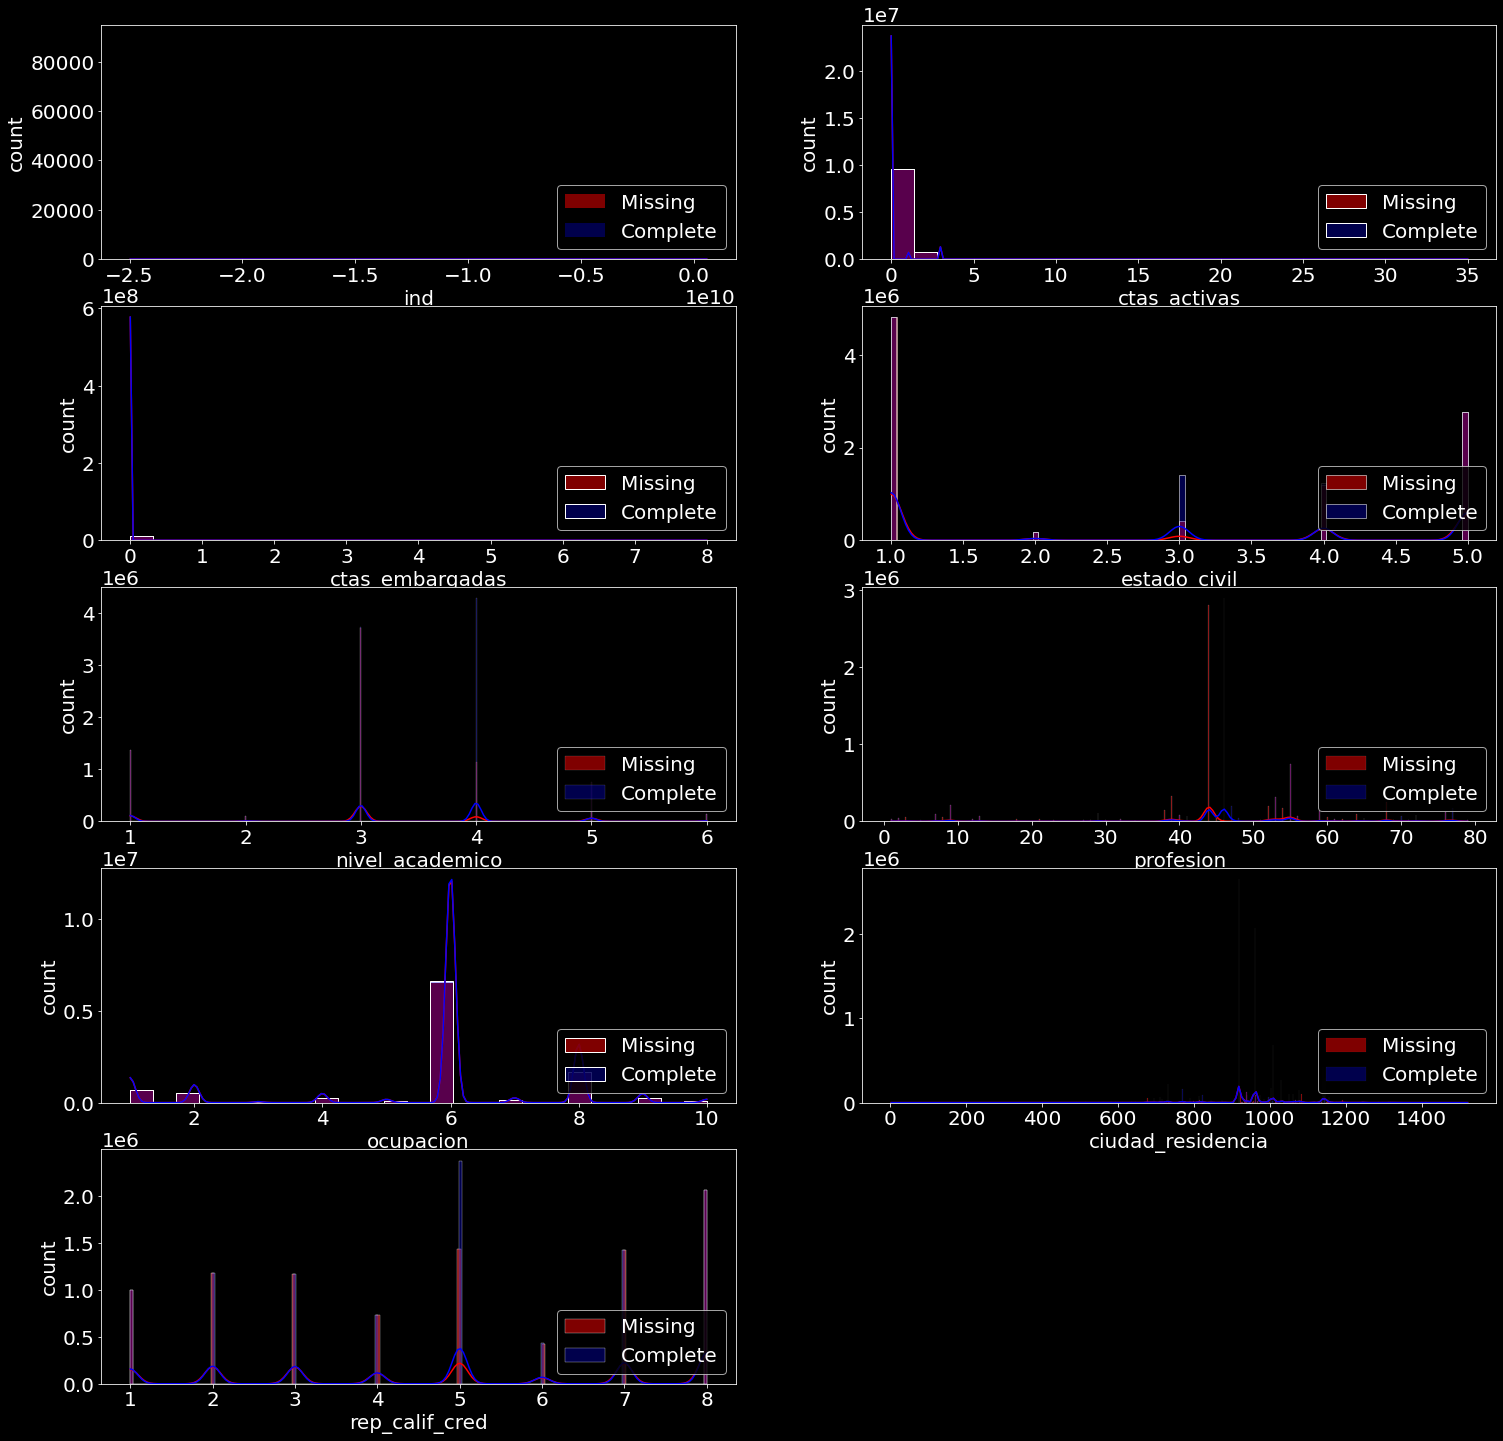

In [36]:
plt.rcParams.update({'font.size': 20})
plt.style.use("dark_background")
var_hist = Var_missing
plt.figure(figsize=(25,25*1))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(5,2,i+1)
    sns.histplot(df_missing[var], color='r', kde=True , label='Missing', alpha = 0.5)
    sns.histplot(df_complete[var], color='b', kde=True, label='Complete',alpha = 0.3)
    plt.legend(loc=4)
    plt.xlabel(var)
    #plt.tight_layout()
    plt.ylabel("count")

## Integer verification

In [10]:
features = pd.DataFrame(df_missing.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index
features_i

Index(['mes', 'genero', 'ind_mora_vigente', 'cartera_castigada', 'tenencia_tc',
       'tiene_consumo', 'tiene_crediagil', 'tiene_ctas_activas',
       'tiene_ctas_embargadas', 'pension_fopep', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2'],
      dtype='object')

In [11]:
for i in features_i:
    df_complete[i] = df_complete[i].round()

In [12]:
features_o = ['estado_civil',
              'nivel_academico',
              'profesion',
              'ocupacion',
              'ciudad_residencia',
              'rep_calif_cred']

In [13]:
for i in features_o:
    df_complete[i] = [math.ceil(x) for x in df_complete[i]]
    df_complete[i] = df_complete[i].astype('int')

In [14]:
df_complete['estado_civil'].value_counts()

 1     4812909
 5     2771870
 3     1406246
 4     1225670
 2      180610
 6          82
 7          10
 24          3
 17          3
-32          2
 8           2
Name: estado_civil, dtype: int64

## Outliers verification

In [15]:
for i in Var_missing:
    ind = df_complete[df_complete[i] > np.nanmax(df_missing[i])].index
    df_complete.loc[ind,i] =  np.nanmax(df_missing[i])
    ind = df_complete[df_complete[i] < np.nanmin(df_missing[i])].index
    df_complete.loc[ind,i] =  np.nanmin(df_missing[i])

In [16]:
df_complete['estado_civil'].value_counts()

1.0    4812911
5.0    2771970
3.0    1406246
4.0    1225670
2.0     180610
Name: estado_civil, dtype: int64

# Unlabeling

In [17]:
labels = pd.read_csv("/mnt/workstation/data/labels.csv")
labels

,Categoria,Particip,Variable,Label,Var_mean
0,CASADO,9.678370e+05,estado_civil,5,gasto_familiar
1,UNION LIBRE,8.678049e+05,estado_civil,4,gasto_familiar
2,DIVORCIADO,7.881397e+05,estado_civil,3,gasto_familiar
3,VIUDO,6.969590e+05,estado_civil,2,gasto_familiar
4,SOLTERO,6.912766e+05,estado_civil,1,gasto_familiar
...,...,...,...,...,...
9109,D,1.101550e+06,rep_calif_cred,5,ingreso_nompen
9110,F,1.099701e+06,rep_calif_cred,4,ingreso_nompen
9111,G,1.099355e+06,rep_calif_cred,3,ingreso_nompen
9112,H,1.095841e+06,rep_calif_cred,2,ingreso_nompen


In [18]:
for j in ['gasto_familiar']:#,'ind','ingreso_nompen']:
    for i in features_o:
        tag = labels[labels['Var_mean'] ==j]
        tmp = pd.pivot_table(tag[tag['Variable'] == i][['Categoria','Label']],
                       values='Label',
                       columns='Categoria').round()
        tmp = tmp.T
        tmp = tmp.reset_index()
        tmp.index = tmp['Label']
        tmp = tmp.to_dict()['Categoria']
        nueva_variable = i+'_untag_'+j
        #variable_tag = i+'_tag_'+j
        df_complete[nueva_variable] = df_complete[i].map(tmp)

In [19]:
df_complete

,id_cli,mes,cupo_total_tc,cuota_de_vivienda,ind,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cant_mora_30_tdc_ult_3m_sf,...,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2,estado_civil_untag_gasto_familiar,nivel_academico_untag_gasto_familiar,profesion_untag_gasto_familiar,ocupacion_untag_gasto_familiar,ciudad_residencia_untag_gasto_familiar,rep_calif_cred_untag_gasto_familiar
0,3.0,1,6600000.0,0.0,3.281244e+06,0,0,0,0,0,...,0,0,0,0,CASADO,ESPECIALIZACION,ADMINISTRACION,Empleado,BELLO,A
1,3.0,2,6600000.0,0.0,3.155679e+06,0,0,0,0,0,...,0,0,0,0,CASADO,ESPECIALIZACION,ADMINISTRACION,Empleado,BELLO,G
2,3.0,3,6600000.0,0.0,2.775457e+06,0,0,0,0,0,...,0,0,0,0,CASADO,ESPECIALIZACION,ADMINISTRACION,Empleado,BELLO,A
3,3.0,4,6600000.0,0.0,2.123905e+06,0,0,0,0,0,...,0,0,0,0,CASADO,ESPECIALIZACION,ADMINISTRACION,Empleado,BELLO,E
4,3.0,5,6600000.0,0.0,2.601551e+06,0,0,0,0,0,...,0,0,0,0,CASADO,ESPECIALIZACION,ADMINISTRACION,Empleado,BELLO,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10397402,8704800.0,7,1700000.0,0.0,7.537400e+05,0,0,0,0,0,...,0,0,0,0,DIVORCIADO,BACHILLER,NINGUNA,Rentista de Capital,MANIZALES,A
10397403,8704800.0,8,1700000.0,0.0,5.397950e+05,0,0,0,0,0,...,0,0,0,0,DIVORCIADO,BACHILLER,NINGUNA,Rentista de Capital,MANIZALES,A
10397404,8704800.0,9,1700000.0,0.0,6.162950e+05,0,0,0,0,0,...,0,0,0,0,DIVORCIADO,BACHILLER,NINGUNA,Rentista de Capital,MANIZALES,A
10397405,8704800.0,10,1700000.0,0.0,5.230038e+05,0,0,0,0,0,...,0,0,0,0,DIVORCIADO,BACHILLER,NINGUNA,Rentista de Capital,MANIZALES,A


In [20]:
df_complete['genero'].value_counts()

2    5259087
1    5138320
Name: genero, dtype: int64

In [21]:
conditions = [
    (df_complete['genero'] == 2),
    (df_complete['genero'] == 1)
]
values = ['M','F']
df_complete['genero_untag'] = np.select(conditions, values)

In [22]:
df_complete['genero_untag'].value_counts()

M    5259087
F    5138320
Name: genero_untag, dtype: int64

## Final Stats

In [23]:
features = pd.DataFrame(df_complete.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [24]:
df_complete[features_o].describe().T

,count,unique,top,freq
estado_civil_untag_gasto_familiar,10397407,5,SOLTERO,4812911
nivel_academico_untag_gasto_familiar,10397407,6,BACHILLER,4286128
profesion_untag_gasto_familiar,10397407,79,QUIMICA FARMACEUTICA,2898178
ocupacion_untag_gasto_familiar,10397407,10,Empleado,6611586
ciudad_residencia_untag_gasto_familiar,10397407,1513,BOGOTA D.C.,2642397
rep_calif_cred_untag_gasto_familiar,10397407,8,C,2380434
genero_untag,10397407,2,M,5259087


In [25]:
df_complete[features_i].describe().T

,count,mean,std,min,25%,50%,75%,max
mes,10397407.0,6.005029,3.313589,1.0,3.0,7.0,9.0,11.0
mora_max,10397407.0,4.967563,23.371495,0.0,0.0,0.0,1.0,3367.0
cant_moras_30_ult_12_meses,10397407.0,0.075803,0.586578,0.0,0.0,0.0,0.0,12.0
cant_moras_60_ult_12_meses,10397407.0,0.039700,0.448331,0.0,0.0,0.0,0.0,12.0
cant_moras_90_ult_12_meses,10397407.0,0.026409,0.368346,0.0,0.0,0.0,0.0,12.0
cant_mora_30_tdc_ult_3m_sf,10397407.0,0.028687,0.213538,0.0,0.0,0.0,0.0,11.0
cant_mora_30_consum_ult_3m_sf,10397407.0,0.114740,0.758378,0.0,0.0,0.0,0.0,144.0
codigo_ciiu,10397407.0,760.597982,2142.521840,0.0,10.0,10.0,10.0,9900.0
cant_oblig_tot_sf,10397407.0,2.653329,3.342537,0.0,0.0,2.0,4.0,139.0
cant_cast_ult_12m_sr,10397407.0,0.160713,1.629919,0.0,0.0,0.0,0.0,638.0


In [26]:
df_complete[features_f].describe().T

,count,mean,std,min,25%,50%,75%,max
id_cli,10397407.0,3.402871e+06,2.464189e+06,3.000000e+00,1378075.000,2.906101e+06,4.959856e+06,8.704800e+06
cupo_total_tc,10397407.0,4.221706e+06,1.014062e+07,0.000000e+00,0.000,0.000000e+00,4.550000e+06,9.207975e+08
cuota_de_vivienda,10397407.0,9.753858e+04,7.779158e+05,0.000000e+00,0.000,0.000000e+00,0.000000e+00,5.203555e+08
ind,10397407.0,1.265275e+06,2.495438e+07,-2.496766e+10,248479.115,8.128379e+05,1.950738e+06,5.594790e+08
saldo_no_rot_mdo,10397407.0,6.718640e+06,5.543315e+07,0.000000e+00,0.000,5.232590e+04,2.962777e+06,3.279755e+10
ctas_activas,10397407.0,1.018372e+00,4.006896e-01,0.000000e+00,1.000,1.000000e+00,1.000000e+00,3.500000e+01
ctas_embargadas,10397407.0,2.989618e-03,5.802172e-02,0.000000e+00,0.000,0.000000e+00,0.000000e+00,8.000000e+00
mediana_nom3,10397407.0,1.047801e+06,2.398036e+06,0.000000e+00,0.000,0.000000e+00,1.492211e+06,4.650000e+08
mediana_pen3,10397407.0,1.565739e+05,8.860843e+05,0.000000e+00,0.000,0.000000e+00,0.000000e+00,8.252953e+08
cupo_tc_mdo,10397407.0,7.146969e+06,2.357715e+07,0.000000e+00,0.000,0.000000e+00,6.400000e+06,5.002155e+10


In [ ]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = Var_missing
plt.figure(figsize=(25,25*2))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(5,2,i+1)
    sns.histplot(df_missing[var], color='r', kde=True , label='Missing', alpha = 0.7)
    sns.histplot(df_complete[var], color='b', kde=True, label='Complete',alpha = 0.3)
    plt.legend(loc=4)
    plt.xlabel(var)
    plt.ylabel("count")

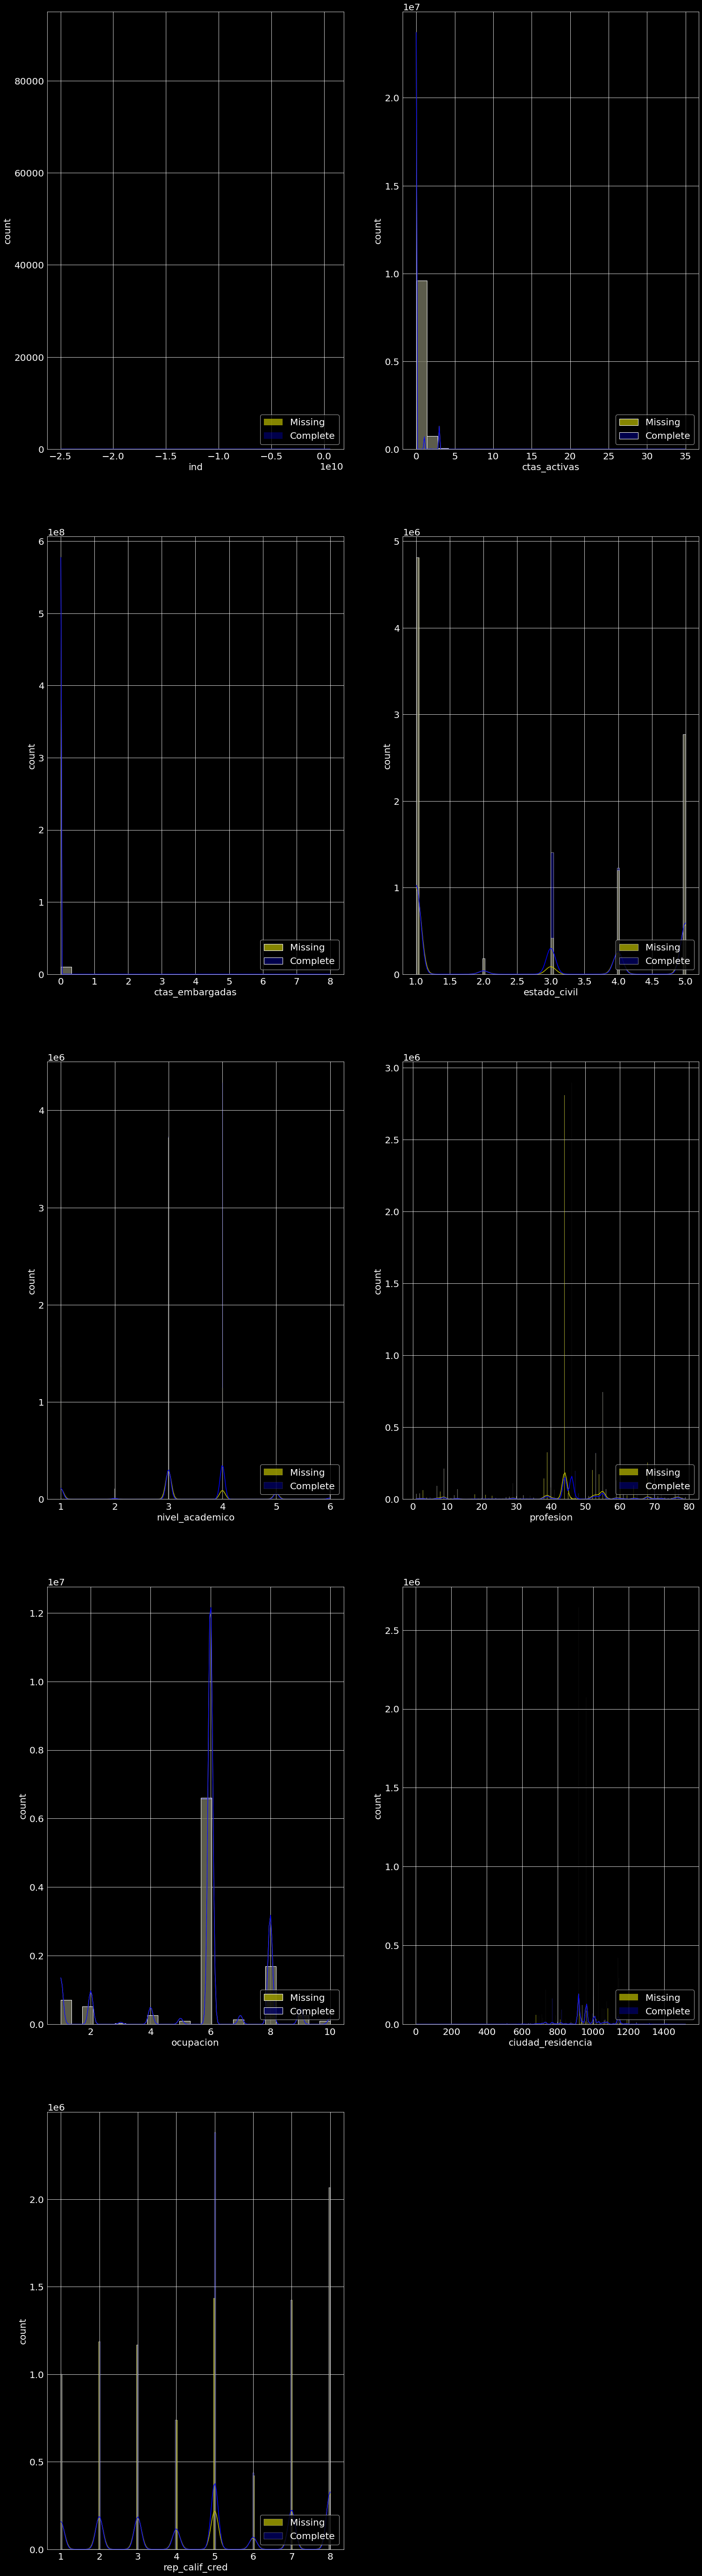

In [37]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = Var_missing
plt.figure(figsize=(25,25*2))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(5,2,i+1)
    sns.histplot(df_missing[var], color='r', kde=True , label='Missing', alpha = 0.7)
    sns.histplot(df_complete[var], color='b', kde=True, label='Complete',alpha = 0.3)
    plt.legend(loc=4)
    plt.xlabel(var)
    plt.ylabel("count")

In [35]:
df_complete.to_csv("/mnt/workstation/data/DataXmes_full_ok.csv", index=False)
df_complete.shape

(10397407, 44)